In [2]:
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# 깨짐 방지를 위한 Font 지정
import os
if os.name =='nt' : 
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [5]:
gg = pd.read_csv('./공공빅데이터_프로젝트/전국시군구데이터_전처리용/전국데이터_전처리.csv', encoding = "euc-kr")
cor = pd.DataFrame(gg)
cor.head()

FileNotFoundError: [Errno 2] No such file or directory: './공공빅데이터_프로젝트/전국시군구데이터_전처리용/전국데이터_전처리.csv'

In [36]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  113 non-null    int64  
 1   충전소         113 non-null    object 
 2   시군구         113 non-null    object 
 3   시군구코드       113 non-null    int64  
 4   총생산인구수      113 non-null    int64  
 5   총인구수        113 non-null    int64  
 6   공시지가        113 non-null    float64
 7   차고지개수       113 non-null    int64  
 8   주차장개수       113 non-null    int64  
 9   도시공원_개수     113 non-null    int64  
 10  총생산         113 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 9.8+ KB


In [37]:
del cor['Unnamed: 0']

In [38]:
cor

,충전소,시군구,시군구코드,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산
0,상암수소충전소,마포구,11440,269063,361126,9.212986e+06,0,17,9,19943128.0
1,마곡에코수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0
2,오곡수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0
3,H국회수소충전소,영등포구,11560,267893,369264,6.240179e+06,0,46,8,36095497.0
4,양재수소충전소,서초구,11650,285142,397098,1.114056e+07,0,22,0,35570338.0
...,...,...,...,...,...,...,...,...,...,...
108,하이넷 통영용남수소충전소,통영시,48220,81212,124236,2.569437e+05,1,18,11,3096258.0
109,김해수소충전소,김해시,48250,386937,527523,4.811262e+05,3,42,31,16058319.0
110,하이넷 거제장평수소충전소,거제시,48310,169504,237546,3.297274e+05,0,8,15,9535962.0
111,양산시증산수소충전소,양산시,48330,244781,349290,4.314398e+05,1,21,28,10952945.0


In [39]:
Hyd = pd.read_csv('./전국시군구_수소충전소개수.csv', encoding = "euc-kr")
Hyd_df = pd.DataFrame(Hyd)
Hyd_df.head()

,시군구코드,수소충전소개수
0,31710,4
1,41590,4
2,28110,3
3,41550,3
4,31140,3


In [40]:
cor = pd.merge(cor, Hyd_df, on = '시군구코드', how = 'left')
cor

,충전소,시군구,시군구코드,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,수소충전소개수
0,상암수소충전소,마포구,11440,269063,361126,9.212986e+06,0,17,9,19943128.0,1
1,마곡에코수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,2
2,오곡수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,2
3,H국회수소충전소,영등포구,11560,267893,369264,6.240179e+06,0,46,8,36095497.0,1
4,양재수소충전소,서초구,11650,285142,397098,1.114056e+07,0,22,0,35570338.0,1
...,...,...,...,...,...,...,...,...,...,...,...
108,하이넷 통영용남수소충전소,통영시,48220,81212,124236,2.569437e+05,1,18,11,3096258.0,1
109,김해수소충전소,김해시,48250,386937,527523,4.811262e+05,3,42,31,16058319.0,1
110,하이넷 거제장평수소충전소,거제시,48310,169504,237546,3.297274e+05,0,8,15,9535962.0,1
111,양산시증산수소충전소,양산시,48330,244781,349290,4.314398e+05,1,21,28,10952945.0,1


In [41]:
del cor['시군구코드']

In [42]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   충전소      113 non-null    object 
 1   시군구      113 non-null    object 
 2   총생산인구수   113 non-null    int64  
 3   총인구수     113 non-null    int64  
 4   공시지가     113 non-null    float64
 5   차고지개수    113 non-null    int64  
 6   주차장개수    113 non-null    int64  
 7   도시공원_개수  113 non-null    int64  
 8   총생산      113 non-null    float64
 9   수소충전소개수  113 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 9.7+ KB


In [43]:
cor.to_csv("상관분석데이터.csv", encoding = "EUC-KR")

In [13]:
co = cor.corr()
co

,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,수소충전소개수
총생산인구수,1.000000,0.998740,0.266641,0.302960,0.336671,0.454130,0.758037,0.341193
총인구수,0.998740,1.000000,0.262820,0.308620,0.339006,0.454380,0.756075,0.328615
공시지가,0.266641,0.262820,1.000000,-0.112653,0.098347,-0.173478,0.184014,-0.150980
차고지개수,0.302960,0.308620,-0.112653,1.000000,0.146473,0.102250,0.285971,0.024129
주차장개수,0.336671,0.339006,0.098347,0.146473,1.000000,0.295270,0.144858,-0.098114
도시공원_개수,0.454130,0.454380,-0.173478,0.102250,0.295270,1.000000,0.382508,0.224256
총생산,0.758037,0.756075,0.184014,0.285971,0.144858,0.382508,1.000000,0.530396
수소충전소개수,0.341193,0.328615,-0.150980,0.024129,-0.098114,0.224256,0.530396,1.000000


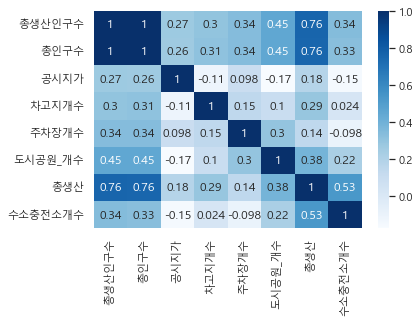

In [14]:
sns.heatmap(co, annot = True, cmap = plt.cm.Blues)
plt.show()

In [ ]:
sns.heatmap(co, annot = True, cmap = plt.cm.Blues)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
del cor['충전소']
del cor['시군구']

In [18]:
standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(cor), 
                              columns=cor.columns) # scaled된 데이터

In [19]:
scaled_df

,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,수소충전소개수
0,0.487942,0.425562,5.016886,-0.541208,-0.134499,-0.836640,0.457253,-0.859676
1,1.567828,1.594994,2.133411,0.732886,0.104846,-0.471747,0.283525,0.173764
2,1.567828,1.594994,2.133411,0.732886,0.104846,-0.471747,0.283525,0.173764
3,0.479142,0.471230,3.203729,-0.541208,1.600749,-0.869812,1.586839,-0.859676
4,0.608880,0.627427,6.192538,-0.541208,0.164682,-1.135188,1.550113,-0.859676
...,...,...,...,...,...,...,...,...
108,-0.924972,-0.903798,-0.445531,0.732886,-0.074663,-0.770296,-0.720901,-0.859676
109,1.374527,1.359335,-0.308799,3.281074,1.361404,-0.106855,0.185576,-0.859676
110,-0.260887,-0.267934,-0.401139,-0.541208,-0.673024,-0.637607,-0.270552,-0.859676
111,0.305306,0.359142,-0.339103,0.732886,0.104846,-0.206371,-0.171458,-0.859676


<AxesSubplot:xlabel='총인구수', ylabel='총생산'>

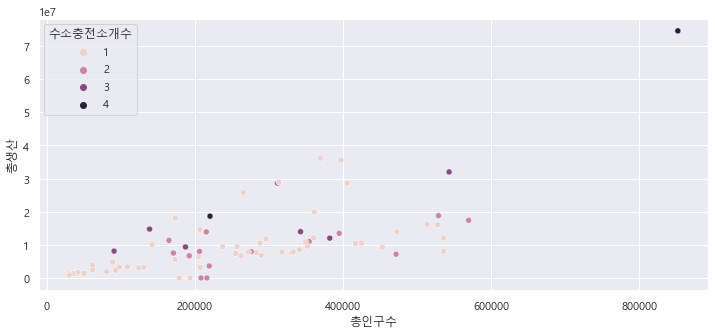

In [32]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='총생산인구수', y='총생산', data=cor, hue = '수소충전소개수')